<a href="https://colab.research.google.com/github/Chrstphr1995/BDA_Project/blob/main/Stock_Prices_%26_SMA_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Prices
Source: https://www.youtube.com/watch?v=d2kXmWzfS0w

# How to trade on simple moving averages

https://www.youtube.com/watch?v=JJO9fKj3_u4

SMA = (Price1 + Price2 + PriceN) / PriceN

# Paradise Papers

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")

In [18]:
import pandas as pd
entities = pd.read_csv("/content/drive/MyDrive/Leaks allgemein/Entities.csv")
entities.head(450000)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,5,6,9,10,11,12,13,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,name,original_name,former_name,jurisdiction,jurisdiction_description,company_type,address,internal_id,incorporation_date,inactivation_date,struck_off_date,dorm_date,status,service_provider,ibcRUC,country_codes,countries,note,valid_until,node_id,sourceID
0,"TIANSHENG INDUSTRY AND TRADING CO., LTD.","TIANSHENG INDUSTRY AND TRADING CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1001256.0,23-MAR-2006,18-FEB-2013,15-FEB-2013,NaN,Defaulted,Mossack Fonseca,25221,HKG,Hong Kong,NaN,The Panama Papers data is current through 2015,10000001,Panama Papers
1,"NINGBO SUNRISE ENTERPRISES UNITED CO., LTD.","NINGBO SUNRISE ENTERPRISES UNITED CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1001263.0,27-MAR-2006,27-FEB-2014,15-FEB-2014,NaN,Defaulted,Mossack Fonseca,25249,HKG,Hong Kong,NaN,The Panama Papers data is current through 2015,10000002,Panama Papers
2,"HOTFOCUS CO., LTD.","HOTFOCUS CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1000896.0,10-JAN-2006,15-FEB-2012,15-FEB-2012,NaN,Defaulted,Mossack Fonseca,24138,HKG,Hong Kong,NaN,The Panama Papers data is current through 2015,10000003,Panama Papers
3,"SKY-BLUE GIFTS & TOYS CO., LTD.","SKY-BLUE GIFTS & TOYS CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1000914.0,06-JAN-2006,16-FEB-2009,15-FEB-2009,NaN,Defaulted,Mossack Fonseca,24012,HKG,Hong Kong,NaN,The Panama Papers data is current through 2015,10000004,Panama Papers
4,FORTUNEMAKER INVESTMENTS CORPORATION,FORTUNEMAKER INVESTMENTS CORPORATION,NaN,SAM,Samoa,NaN,LOYAL PORT LIMITED 8/F; CRAWFORD TOWER 99 JERV...,1001266.0,19-APR-2006,15-MAY-2009,15-FEB-2008,NaN,Changed agent,Mossack Fonseca,R25638,HKG,Hong Kong,NaN,The Panama Papers data is current through 2015,10000005,Panama Papers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449995,HERITAGE AR LTD.,HERITAGE AR LTD.,NaN,BAH,Bahamas,NaN,NaN,115207.0,18-OCT-2000,NaN,31-AUG-2002,NaN,NaN,NaN,115207B,NaN,NaN,NaN,The Bahamas Leaks data is current through earl...,20115207,Bahamas Leaks
449996,VALET CONSULTANTS LTD.,VALET CONSULTANTS LTD.,NaN,BAH,Bahamas,NaN,NaN,115208.0,16-OCT-2000,NaN,01-JAN-2010,NaN,NaN,NaN,115208B,NaN,NaN,NaN,The Bahamas Leaks data is current through earl...,20115208,Bahamas Leaks
449997,BENITA UNITED S.A.,BENITA UNITED S.A.,NaN,BAH,Bahamas,NaN,NaN,115209.0,18-OCT-2000,NaN,NaN,NaN,NaN,NaN,115209B,NaN,NaN,NaN,The Bahamas Leaks data is current through earl...,20115209,Bahamas Leaks
449998,GYNNE LIMITED,GYNNE LIMITED,NaN,BAH,Bahamas,NaN,NaN,115210.0,16-OCT-2000,NaN,10-APR-2003,NaN,NaN,NaN,115210B,NaN,NaN,NaN,The Bahamas Leaks data is current through earl...,20115210,Bahamas Leaks


#Code - Aufteilung der Paper

In [4]:
df_entities = entities
print(df_entities)

                                               name  ...       sourceID
0          TIANSHENG INDUSTRY AND TRADING CO., LTD.  ...  Panama Papers
1       NINGBO SUNRISE ENTERPRISES UNITED CO., LTD.  ...  Panama Papers
2                                HOTFOCUS CO., LTD.  ...  Panama Papers
3                   SKY-BLUE GIFTS & TOYS CO., LTD.  ...  Panama Papers
4              FORTUNEMAKER INVESTMENTS CORPORATION  ...  Panama Papers
...                                             ...  ...            ...
495033                             Malno Foundation  ...  Bahamas Leaks
495034                    HARD WORK LIFE FOUNDATION  ...  Bahamas Leaks
495035                       FIORDILATTE FOUNDATION  ...  Bahamas Leaks
495036                            Paweco Foundation  ...  Bahamas Leaks
495037                              Beli Foundation  ...  Bahamas Leaks

[495038 rows x 21 columns]


In [5]:
df_entities_sourceID = entities['sourceID']
print(df_entities_sourceID)

0         Panama Papers
1         Panama Papers
2         Panama Papers
3         Panama Papers
4         Panama Papers
              ...      
495033    Bahamas Leaks
495034    Bahamas Leaks
495035    Bahamas Leaks
495036    Bahamas Leaks
495037    Bahamas Leaks
Name: sourceID, Length: 495038, dtype: object


In [15]:
import matplotlib.pyplot as plt
from pylab import rcParams
#%matplotlib inline
#plt.style.use('ggplot')

#Story - Aufteilung der Paper

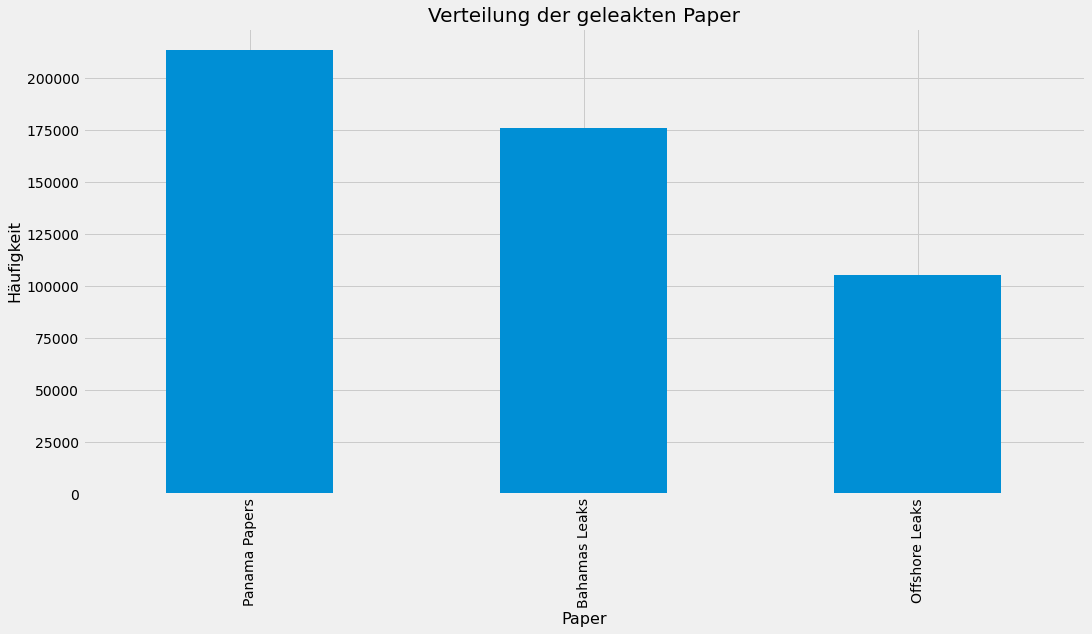

In [10]:
entities['sourceID'].value_counts().plot.bar()
plt.xlabel("Paper", size='16')
plt.ylabel("Häufigkeit", size='16')
plt.title("Verteilung der geleakten Paper", size='20')
rcParams['figure.figsize'] = 16, 8

# Code - Die Strippenzieher

In [12]:
df_entities_serivce_provider = entities['service_provider']
print(df_entities_serivce_provider)

0         Mossack Fonseca
1         Mossack Fonseca
2         Mossack Fonseca
3         Mossack Fonseca
4         Mossack Fonseca
               ...       
495033                NaN
495034                NaN
495035                NaN
495036                NaN
495037                NaN
Name: service_provider, Length: 495038, dtype: object


# Story - Die Strippenzieher

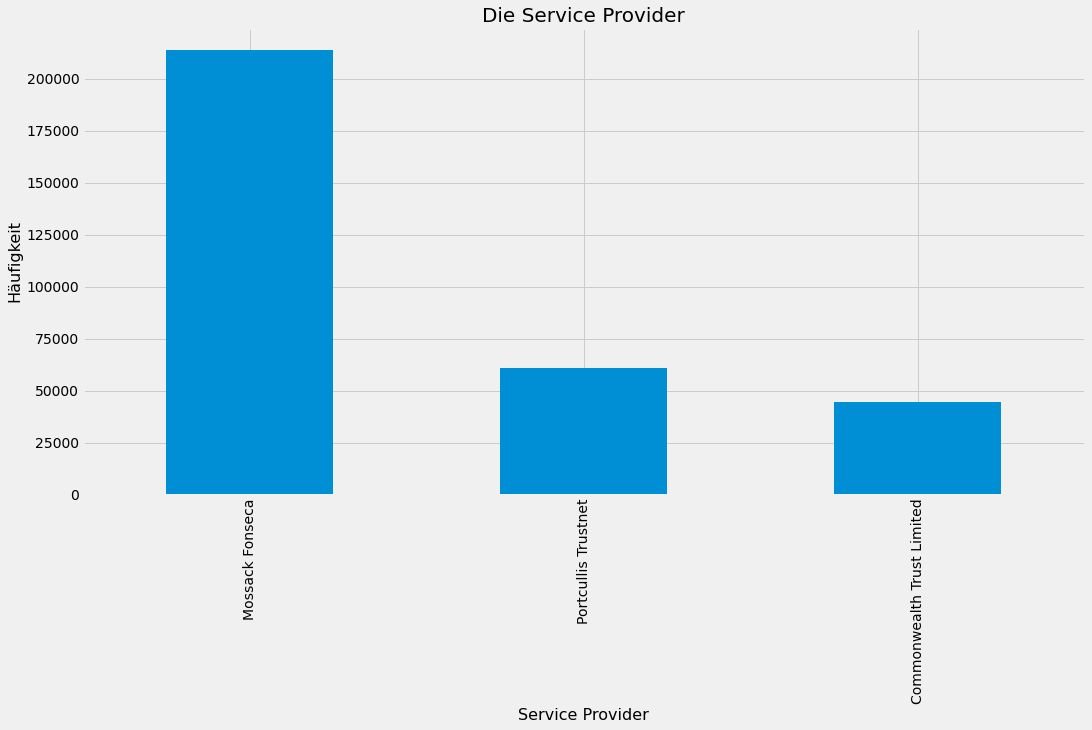

In [14]:
entities['service_provider'].value_counts().plot.bar()
plt.xlabel("Service Provider", size='16')
plt.ylabel("Häufigkeit", size='16')
plt.title("Die Service Provider", size='20')
rcParams['figure.figsize'] = 16, 8

# Code - Meistgenannte Länder

In [48]:
df_entities_countries = entities['countries']
print(df_entities_countries)

0         Hong Kong
1         Hong Kong
2         Hong Kong
3         Hong Kong
4         Hong Kong
            ...    
495033          NaN
495034          NaN
495035          NaN
495036          NaN
495037          NaN
Name: countries, Length: 495038, dtype: object


# Story - Meistgenannte Länder

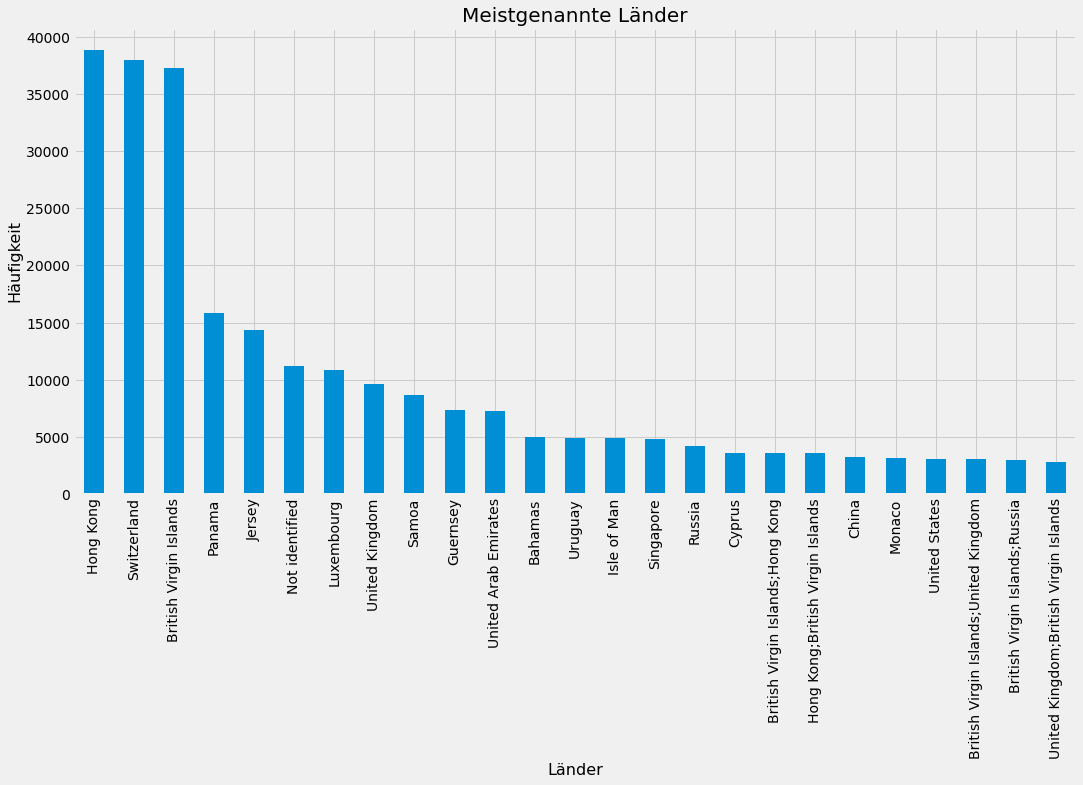

In [49]:
entities['countries'].value_counts().head(25).plot.bar()
plt.xlabel("Länder", size='16')
plt.ylabel("Häufigkeit", size='16')
plt.title("Meistgenannte Länder", size='20')
rcParams['figure.figsize'] = 16, 8

# Code - Vergleich von Gründungs- und Auflösungsdaten

In [50]:
df_entities_incorporation_date = entities['incorporation_date']
df_entities_inactivation_date = entities['inactivation_date']
df_dates = pd.concat([df_entities_incorporation_date, df_entities_inactivation_date], axis=1)
print(df_dates)

       incorporation_date inactivation_date
0             23-MAR-2006       18-FEB-2013
1             27-MAR-2006       27-FEB-2014
2             10-JAN-2006       15-FEB-2012
3             06-JAN-2006       16-FEB-2009
4             19-APR-2006       15-MAY-2009
...                   ...               ...
495033        10-FEB-2016               NaN
495034        02-FEB-2016               NaN
495035        19-FEB-2016               NaN
495036        07-MAR-2016               NaN
495037        01-MAR-2016               NaN

[495038 rows x 2 columns]


# Story - Vergleich von Gründungs- und Auflösungsdaten

In [51]:
entities['incorporation_date'] = pd.to_datetime(entities.incorporation_date)
entities['inactivation_date'] = pd.to_datetime(entities.inactivation_date)

Text(0, 0.5, 'Anzahl Briefkastenfirmen')

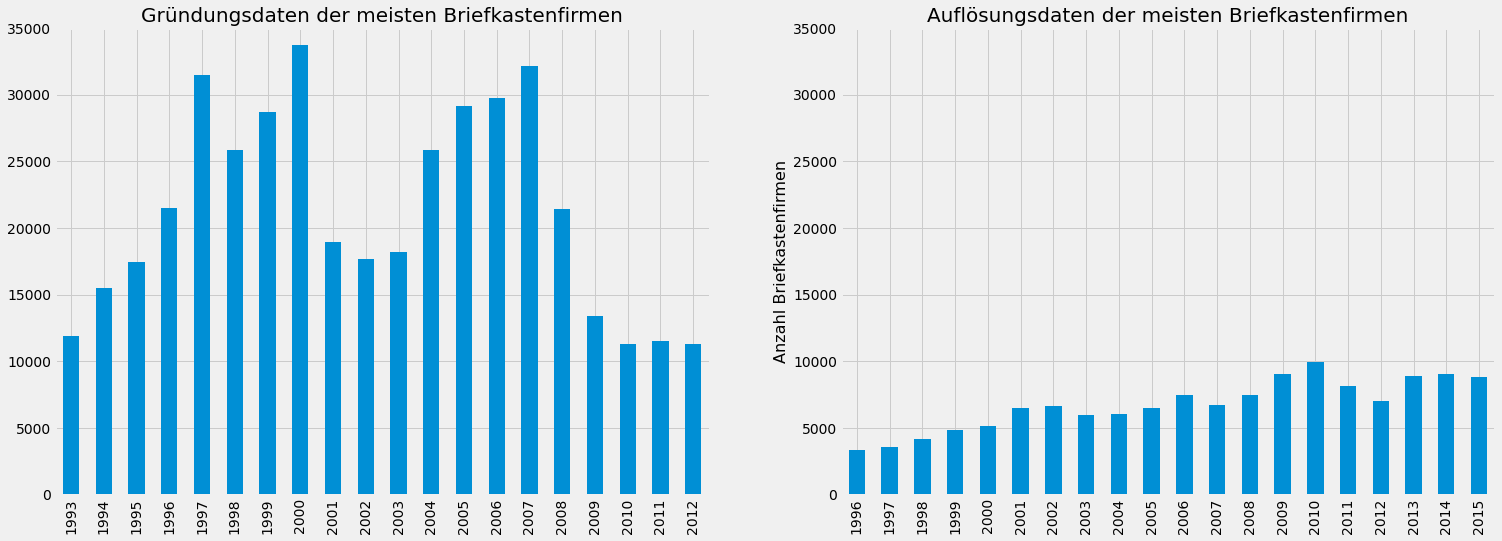

In [52]:
fig, axarr = plt.subplots(1, 2, figsize=(23, 8))

incorporation_dates.dt.year.dropna().astype(int).value_counts().head(20).sort_index().plot.bar(
    ax=axarr[0]
)
axarr[0].set_title("Gründungsdaten der meisten Briefkastenfirmen", size='20')
axarr[0].set_ylim([0, 35000])
plt.ylabel("Anzahl Briefkastenfirmen", size='16')


entities['inactivation_date'].dt.year.dropna().astype(int).value_counts().head(20).sort_index().plot.bar(
    ax=axarr[1]
)
axarr[1].set_title("Auflösungsdaten der meisten Briefkastenfirmen", size='20')
axarr[1].set_ylim([0, 35000])
plt.ylabel("Anzahl Briefkastenfirmen")

# Name

In [178]:
df_entities = entities
print(df_entities)

                                               name  ...       sourceID
0          TIANSHENG INDUSTRY AND TRADING CO., LTD.  ...  Panama Papers
1       NINGBO SUNRISE ENTERPRISES UNITED CO., LTD.  ...  Panama Papers
2                                HOTFOCUS CO., LTD.  ...  Panama Papers
3                   SKY-BLUE GIFTS & TOYS CO., LTD.  ...  Panama Papers
4              FORTUNEMAKER INVESTMENTS CORPORATION  ...  Panama Papers
...                                             ...  ...            ...
495033                             Malno Foundation  ...  Bahamas Leaks
495034                    HARD WORK LIFE FOUNDATION  ...  Bahamas Leaks
495035                       FIORDILATTE FOUNDATION  ...  Bahamas Leaks
495036                            Paweco Foundation  ...  Bahamas Leaks
495037                              Beli Foundation  ...  Bahamas Leaks

[495038 rows x 21 columns]


In [179]:
df_entities_name = entities['name']
print(df_entities_name)

0            TIANSHENG INDUSTRY AND TRADING CO., LTD.
1         NINGBO SUNRISE ENTERPRISES UNITED CO., LTD.
2                                  HOTFOCUS CO., LTD.
3                     SKY-BLUE GIFTS & TOYS CO., LTD.
4                FORTUNEMAKER INVESTMENTS CORPORATION
                             ...                     
495033                               Malno Foundation
495034                      HARD WORK LIFE FOUNDATION
495035                         FIORDILATTE FOUNDATION
495036                              Paweco Foundation
495037                                Beli Foundation
Name: name, Length: 495038, dtype: object


In [180]:
import pandas as pd
df = pd.DataFrame(df_entities_name)
df.to_excel('Entities.xlsx')

# Noch zu tun

In [ ]:
1) Bruttoinlandsprodukt (also die Wirtschaftsleistung) mit den Aktivitäten der Paper abgleichen
2) Bei "Gründungs- und Auflösungsdaten" die Grafik nach Jahr sortieren
3) 

In [1]:
pip install flask-ngrok

In [2]:
from flask import Flask 
from flask_ngrok import run_with_ngrok

In [9]:
app = Flask(__name__) 
run_with_ngrok(app)

In [10]:
@app.route("/") 
def hello(): 
    return "Hallo"

In [11]:
if __name__ == "__main__": 
  app.run()

# Panama Paper

In [52]:
import pandas as pd
entities = pd.read_csv("/content/drive/MyDrive/panama_papers.nodes.entity.csv")
entities.head(10)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,labels(n),n.valid_until,n.country_codes,n.countries,n.node_id,n.sourceID,n.address,n.name,n.jurisdiction_description,n.service_provider,n.jurisdiction,n.closed_date,n.incorporation_date,n.ibcRUC,n.type,n.status,n.company_type,n.note
0,"[""Entity""]",The Panama Papers data is current through 2015,HKG,Hong Kong,10000001,Panama Papers,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,"TIANSHENG INDUSTRY AND TRADING CO., LTD.",Samoa,Mossack Fonseca,SAM,NaN,23-MAR-2006,25221,NaN,Defaulted,NaN,NaN
1,"[""Entity""]",The Panama Papers data is current through 2015,HKG,Hong Kong,10000002,Panama Papers,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,"NINGBO SUNRISE ENTERPRISES UNITED CO., LTD.",Samoa,Mossack Fonseca,SAM,NaN,27-MAR-2006,25249,NaN,Defaulted,NaN,NaN
2,"[""Entity""]",The Panama Papers data is current through 2015,HKG,Hong Kong,10000003,Panama Papers,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,"HOTFOCUS CO., LTD.",Samoa,Mossack Fonseca,SAM,NaN,10-JAN-2006,24138,NaN,Defaulted,NaN,NaN
3,"[""Entity""]",The Panama Papers data is current through 2015,HKG,Hong Kong,10000004,Panama Papers,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,"SKY-BLUE GIFTS & TOYS CO., LTD.",Samoa,Mossack Fonseca,SAM,NaN,06-JAN-2006,24012,NaN,Defaulted,NaN,NaN
4,"[""Entity""]",The Panama Papers data is current through 2015,HKG,Hong Kong,10000005,Panama Papers,LOYAL PORT LIMITED 8/F; CRAWFORD TOWER 99 JERV...,FORTUNEMAKER INVESTMENTS CORPORATION,Samoa,Mossack Fonseca,SAM,NaN,19-APR-2006,R25638,NaN,Changed agent,NaN,NaN
5,"[""Entity""]",The Panama Papers data is current through 2015,HKG,Hong Kong,10000006,Panama Papers,TWC MANAGEMENT LIMITED SUITE D; 19/F RITZ PLAZ...,8808 HOLDING LIMITED,Samoa,Mossack Fonseca,SAM,NaN,05-JAN-2006,23835,NaN,Active,NaN,NaN
6,"[""Entity""]",The Panama Papers data is current through 2015,HKG,Hong Kong,10000007,Panama Papers,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,KENT DEVELOPMENT LIMITED,Samoa,Mossack Fonseca,SAM,NaN,26-JAN-2004,15757,NaN,Defaulted,NaN,NaN
7,"[""Entity""]",The Panama Papers data is current through 2015,HKG,Hong Kong,10000008,Panama Papers,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,BONUS TRADE LIMITED,Samoa,Mossack Fonseca,SAM,NaN,13-FEB-2004,15910,NaN,Defaulted,NaN,NaN
8,"[""Entity""]",The Panama Papers data is current through 2015,HKG,Hong Kong,10000009,Panama Papers,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,AMARANDAN LTD.,Samoa,Mossack Fonseca,SAM,NaN,26-JAN-2004,15759,NaN,Defaulted,NaN,NaN
9,"[""Entity""]",The Panama Papers data is current through 2015,HKG,Hong Kong,10000010,Panama Papers,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,NEW IDEA LIMITED,Samoa,Mossack Fonseca,SAM,NaN,30-MAR-2004,16462,NaN,Defaulted,NaN,NaN


In [53]:
df_entities = entities
print(df_entities)

         labels(n)  ... n.note
0       ["Entity"]  ...    NaN
1       ["Entity"]  ...    NaN
2       ["Entity"]  ...    NaN
3       ["Entity"]  ...    NaN
4       ["Entity"]  ...    NaN
...            ...  ...    ...
213629  ["Entity"]  ...    NaN
213630  ["Entity"]  ...    NaN
213631  ["Entity"]  ...    NaN
213632  ["Entity"]  ...    NaN
213633  ["Entity"]  ...    NaN

[213634 rows x 18 columns]


In [54]:
df_entities_jurisdiction = entities['n.jurisdiction_description']
print(df_entities_jurisdiction)

0                          Samoa
1                          Samoa
2                          Samoa
3                          Samoa
4                          Samoa
                   ...          
213629    British Virgin Islands
213630    British Virgin Islands
213631    British Virgin Islands
213632    British Virgin Islands
213633    British Virgin Islands
Name: n.jurisdiction_description, Length: 213634, dtype: object


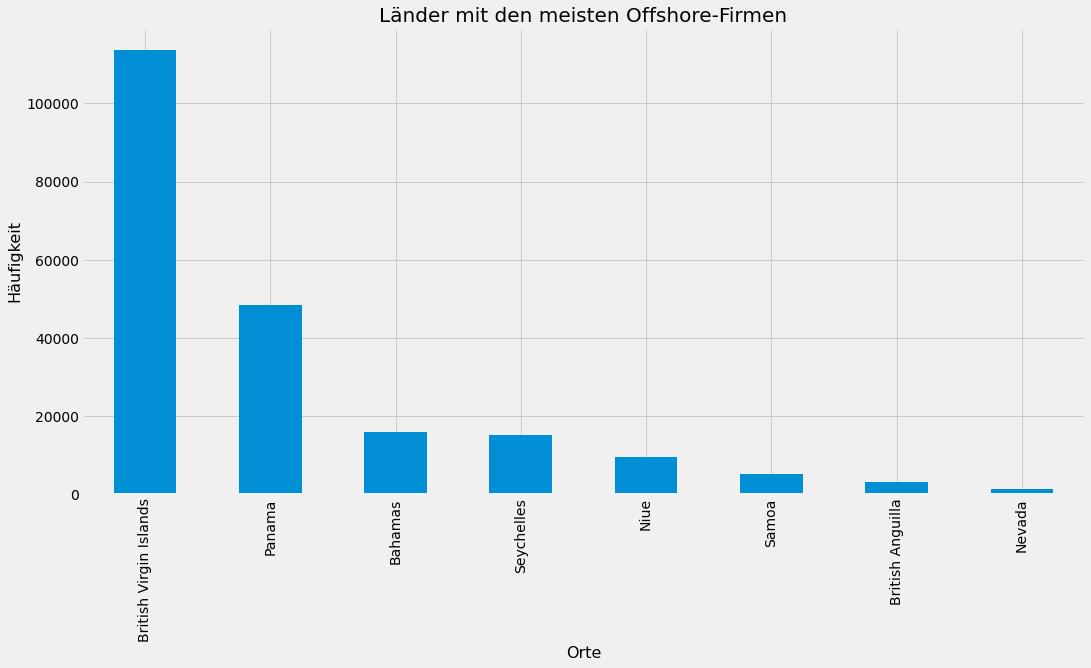

In [55]:
entities['n.jurisdiction_description'].value_counts().head(8).plot.bar()
plt.xlabel("Orte", size='16')
plt.ylabel("Häufigkeit", size='16')
plt.title("Länder mit den meisten Offshore-Firmen", size='20')
rcParams['figure.figsize'] = 16, 8

In [59]:
df_entities_incorporation = entities['n.incorporation_date']
print(df_entities_incorporation)

0         23-MAR-2006
1         27-MAR-2006
2         10-JAN-2006
3         06-JAN-2006
4         19-APR-2006
             ...     
213629    05-JAN-2010
213630    05-JAN-2010
213631    04-JAN-2010
213632    15-DEC-2009
213633    31-DEC-2009
Name: n.incorporation_date, Length: 213634, dtype: object


In [76]:
df_entities_incorporation_date = entities['n.incorporation_date']

In [79]:
entities['n.incorporation_date'] = pd.to_datetime(df_entities_incorporation_date)

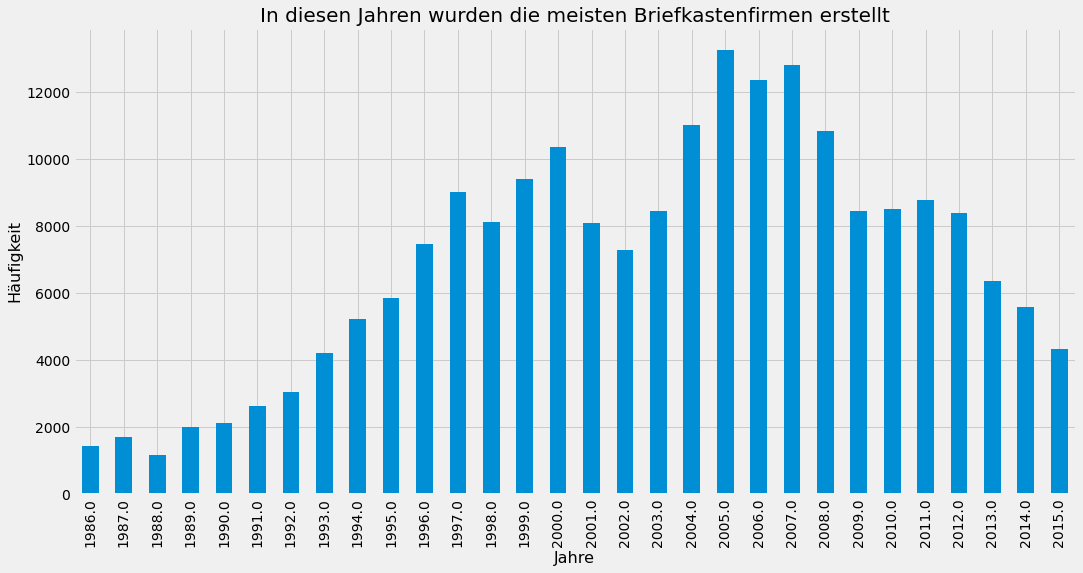

In [85]:
entities['n.incorporation_date'].dt.year.value_counts().head(30).sort_index().plot.bar()
plt.xlabel("Jahre", size='16')
plt.ylabel("Häufigkeit", size='16')
plt.title("In diesen Jahren wurden die meisten Briefkastenfirmen erstellt", size='20')
rcParams['figure.figsize'] = 16, 8

In [32]:
import pandas as pd
officer = pd.read_csv("/content/drive/MyDrive/panama_papers.nodes.officer.csv")
officer.head(10)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,labels(n),n.valid_until,n.country_codes,n.countries,n.node_id,n.sourceID,n.address,n.name,n.jurisdiction_description,n.service_provider,n.jurisdiction,n.closed_date,n.incorporation_date,n.ibcRUC,n.type,n.status,n.company_type,n.note
0,"[""Officer""]",The Panama Papers data is current through 2015,KOR,South Korea,12000001,Panama Papers,NaN,KIM SOO IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[""Officer""]",The Panama Papers data is current through 2015,CHN,China,12000002,Panama Papers,NaN,Tian Yuan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[""Officer""]",The Panama Papers data is current through 2015,AUS,Australia,12000003,Panama Papers,NaN,GREGORY JOHN SOLOMON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[""Officer""]",The Panama Papers data is current through 2015,JPN,Japan,12000004,Panama Papers,NaN,MATSUDA MASUMI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[""Officer""]",The Panama Papers data is current through 2015,VNM,Viet Nam,12000005,Panama Papers,NaN,HO THUY NGA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"[""Officer""]",The Panama Papers data is current through 2015,AUS,Australia,12000006,Panama Papers,NaN,RACHMAT ARIFIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"[""Officer""]",The Panama Papers data is current through 2015,PHL,Philippines,12000007,Panama Papers,NaN,TAN SUN-HUA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"[""Officer""]",The Panama Papers data is current through 2015,TWN,Taiwan,12000008,Panama Papers,NaN,Ou Yang Yet-Sing and Chang Ko,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"[""Officer""]",The Panama Papers data is current through 2015,TWN,Taiwan,12000009,Panama Papers,NaN,Wu Chi-Ping and Wu Chou Tsan-Ting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"[""Officer""]",The Panama Papers data is current through 2015,CHN,China,12000010,Panama Papers,NaN,ZHONG LI MING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df_officer = officer
print(df_officer)

          labels(n)  ...                                       n.note
0       ["Officer"]  ...                                          NaN
1       ["Officer"]  ...                                          NaN
2       ["Officer"]  ...                                          NaN
3       ["Officer"]  ...                                          NaN
4       ["Officer"]  ...                                          NaN
...             ...  ...                                          ...
238397  ["Officer"]  ...  Record manually added from leaked documents
238398  ["Officer"]  ...  Record manually added from leaked documents
238399  ["Officer"]  ...  Record manually added from leaked documents
238400  ["Officer"]  ...  Record manually added from leaked documents
238401  ["Officer"]  ...  Record manually added from leaked documents

[238402 rows x 18 columns]


In [45]:
df_officer_countries = entities['n.countries']
print(df_officer_countries)

0         South Korea
1               China
2           Australia
3               Japan
4            Viet Nam
             ...     
238397            NaN
238398            NaN
238399            NaN
238400            NaN
238401            NaN
Name: n.countries, Length: 238402, dtype: object


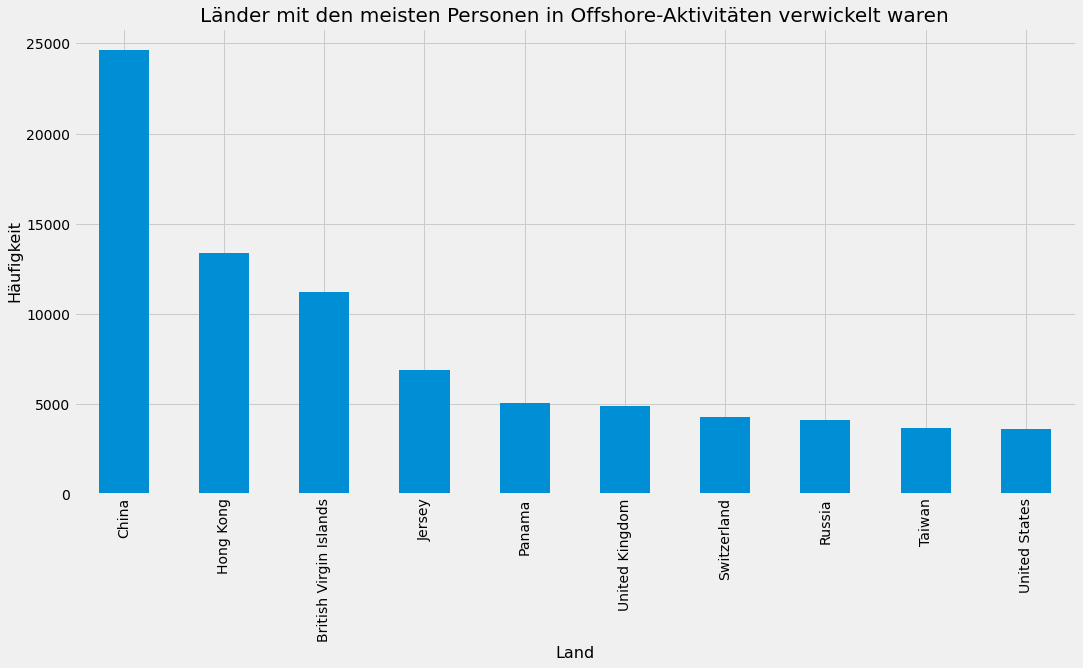

In [48]:
officer['n.countries'].value_counts().head(10).plot.bar()
plt.xlabel("Land", size='16')
plt.ylabel("Häufigkeit", size='16')
plt.title("Länder mit den meisten Personen in Offshore-Aktivitäten verwickelt waren", size='20')
rcParams['figure.figsize'] = 16, 8

In [1]:
pip install alpha_vantage

     |████████████████████████████████| 1.3MB 20.8MB/s 
     |████████████████████████████████| 143kB 48.4MB/s 
     |████████████████████████████████| 296kB 45.7MB/s 
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-cp36-none-any.whl size=3163 sha256=7ad960ba749f06f6021feeac822d71034b1f17e741a749957ade26bd251cfcaa
  Stored in directory: /root/.cache/pip/wheels/d3/00/b3/32d613e19e08a739751dd6bf998cfed277728f8b2127ad4eb7
Successfully built idna-ssl


In [22]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
import time
from alpha_vantage.techindicators import TechIndicators
import pandas as pd
import numpy as np
import plotly as py
import plotly.graph_objs as go

In [9]:
api_key = "NMO1Y2U90QAJBJ2V"

In [237]:
period = 5

In [238]:
ta = TimeSeries(key=api_key, output_format='pandas')
data_ta, meta_data_ta = ta.get_daily(symbol='SAP', outputsize='full')

In [239]:
dfSAP = data_ta['4. close']

In [249]:
ti = TechIndicators(key=api_key, output_format='pandas')
data_ti, meta_data_ti = ti.get_sma(symbol='SAP', interval='daily', time_period=period, series_type='close')

In [250]:
dfSAP_SMA = data_ti
dfSAP = data_ta['4. close'].iloc[period-1::]

In [ ]:
#dfSAP.index = dfSAP_SMA.index

In [251]:
df_Gesamt = pd.concat([dfSAP, dfSAP_SMA], axis=1)
print(df_Gesamt)

            4. close       SMA
date                          
1999-11-01     36.31       NaN
1999-11-02     36.38       NaN
1999-11-03     35.94       NaN
1999-11-04     35.00       NaN
1999-11-05     35.38   28.9199
...              ...       ...
2021-02-12    131.93  131.4320
2021-02-16       NaN  131.2840
2021-02-17       NaN  130.2380
2021-02-18       NaN  130.0400
2021-02-19       NaN  128.9000

[5360 rows x 2 columns]


In [252]:
df = pd.DataFrame(df_Gesamt)
df.to_excel('SAP_Schlusskurs_vs._SMA2.xlsx')

In [253]:
df = pd.read_excel('SAP_Schlusskurs_vs._SMA2.xlsx')

In [254]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=df['date'],
               y=df['4. close'],
               name="SAP",
               line=dict(color="green")))

fig.add_trace(
    go.Scatter(x=df['date'],
               y=df['SMA'],
               name="SMA",
               line=dict(color="black")))

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.update_layout(
    title_text="Kursverläufe bis heute",
    xaxis_domain=[0.05, 1.0]
)

fig.show()